In [1]:
!pip install yfinance

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
import yfinance as yf

In [3]:

tesla = yf.Ticker('TSLA')

tesla_data= tesla.history(period = 'max')

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [4]:
from  bs4 import BeautifulSoup
import requests
import pandas as pd

In [5]:
data = requests.get( """https://companiesmarketcap.com/tesla/revenue/#:~:text=According%20to%20Tesla'
                        s%20latest%20financial,sale%20of%20goods%20or%20services.""").text
soup = BeautifulSoup(data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=['Year', 'Revenue', 'Change'])
for row in soup.find("table", {'class':'table'}).find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        year = col[0].text
        revenue = col[1].text
        change = col[2].text
        tesla_revenue = tesla_revenue.append({'Year':year,
                                                   'Revenue':revenue,
                                                   'Change':change},
                                                    ignore_index=True)  
tesla_revenue.tail()

,Year,Revenue,Change
10,2013,$2.01 B,387.23%
11,2012,$0.41 B,102.34%
12,2011,$0.20 B,74.95%
13,2010,$0.11 B,4.29%
14,2009,$0.11 B,


# Question 3 - Extracting GameStop Stock Data Using yfinance 

In [6]:
import yfinance as yf

In [10]:
gamestop = yf.Ticker('GME')

gme_data= gamestop.history(period = 'max')

gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [11]:
from  bs4 import BeautifulSoup
import requests
import pandas as pd

In [12]:
data = requests.get( """https://companiesmarketcap.com/gamestop/marketcap/""").text
soup = BeautifulSoup(data, 'html.parser')
gme_revenue = pd.DataFrame(columns=['Year', 'Revenue', 'Change'])
for row in soup.find("table", {'class':'table'}).find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        year = col[0].text
        revenue = col[1].text
        change = col[2].text
        gme_revenue = gme_revenue.append({'Year':year,
                                                   'Revenue':revenue,
                                                   'Change':change},
                                                    ignore_index=True)  
gme_revenue.tail()

,Year,Revenue,Change
18,2006,$4.17 B,81.66%
19,2005,$2.30 B,102.8%
20,2004,$1.13 B,32.93%
21,2003,$0.85 B,52.64%
22,2002,$0.55 B,


# Question 5 - Tesla Stock and Revenue Dashboard

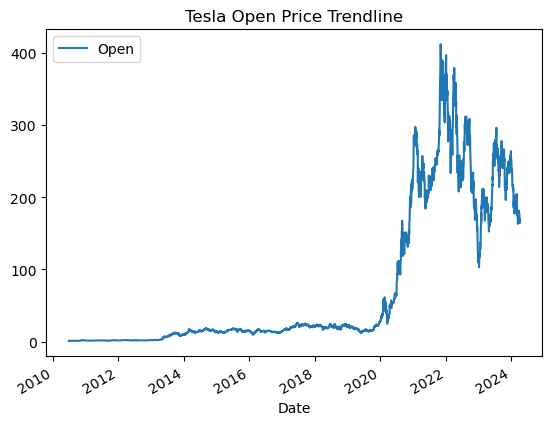

In [13]:
import matplotlib.pyplot as plt

def make_graph():
    
    tesla_data.plot(x='Date', y='Open')
    
    plt.title('Tesla Open Price Trendline')
    
    plt.legend(loc=2)
    
make_graph()
    
    

# Question 6 - GameStop Stock and Revenue Dashboard

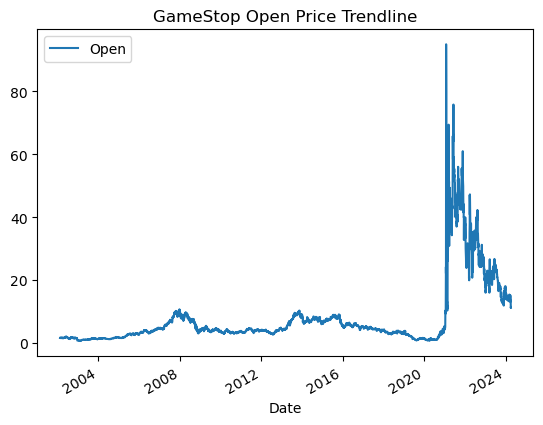

In [14]:
import matplotlib.pyplot as plt

def make_graph():
    
    gme_data.plot(x='Date', y='Open')
    
    plt.title('GameStop Open Price Trendline')
    
    plt.legend(loc=2)
    
make_graph()